In [22]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from pprint import pprint

import scipy.stats as stats

#from census import Census

#Need api file



In [2]:
# import housing file
US_housing_file = "Housing Prices for US.csv"
US_housing_data = pd.read_csv(US_housing_file)
US_housing_data.head()

,DATE,MSPUS
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


In [3]:
US_housing= US_housing_data.rename(columns={"MSPUS":"Avg Home Price","DATE":"Date (Quarterly)"})
US_housing.head()

,Date (Quarterly),Avg Home Price
0,1/1/1963,17800
1,4/1/1963,18000
2,7/1/1963,17900
3,10/1/1963,18500
4,1/1/1964,18500


<function matplotlib.pyplot.show(*args, **kw)>

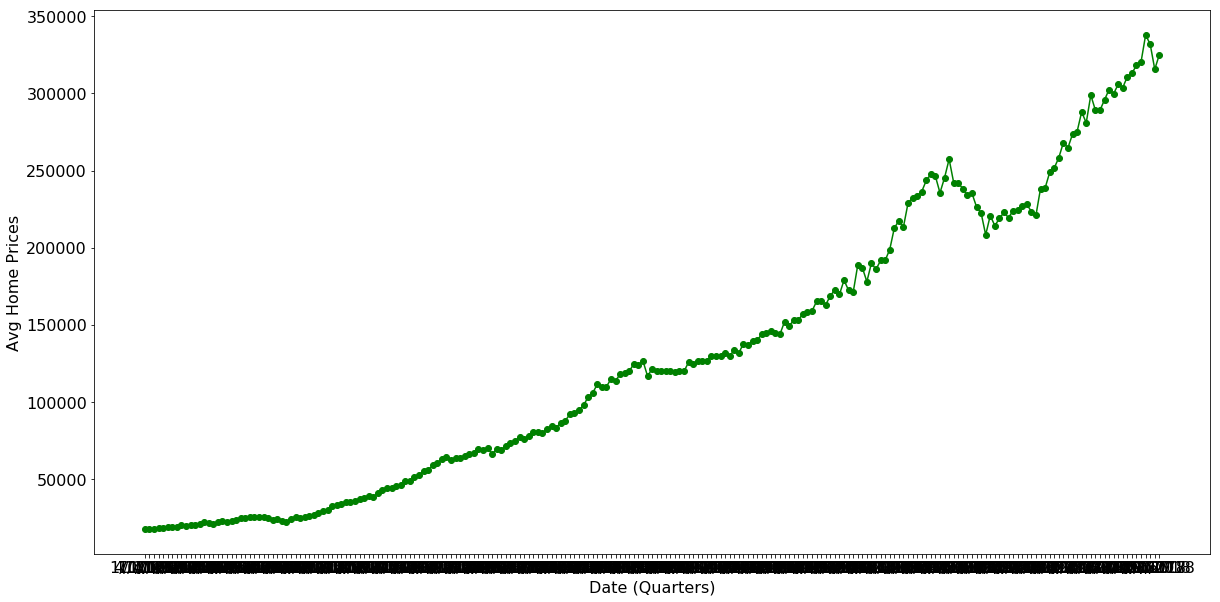

In [4]:
# plot graph of housing prices

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

fig1, ax1 = plt.subplots()

ax1.set_xlabel("Date (Quarters)")
ax1.set_ylabel("Avg Home Prices")

data1 = US_housing["Avg Home Price"]
x_axis1 = US_housing["Date (Quarterly)"]

cost_trend = plt.plot(x_axis1,data1,color='g',marker = "o")

plt.show



In [5]:
#Import data from FRED

# https://api.stlouisfed.org/fred/series/observations?series_id=GNPCA&api_key=abcdefghijklmnopqrstuvwxyz123456
FRED_url = "https://api.stlouisfed.org/fred/series/observations?series_id="

housing_US_seriesid = "MSPUS"
housing_south_seriesid = "ASPS"
housing_west_seriesid = "ASPW"
housing_northeast_seriesid = "ASPNE"
housing_midwest_seriesid = "ASPMW"

fedfund_seriesid = "FEDFUNDS"

#set the data frequency (d=daily,w=weekly,m=monthly,a=annually)
frequency = "a"

# How will data be summarized (avg, sum, eop=end of period, default is avg)
aggregation = "avg"

api_key = "fd8c22bb4ce3ecd6d465947f86b42594"

query_url_housing = f'{FRED_url}{housing_US_seriesid}&api_key={api_key}&file_type=json'
query_url_south = f'{FRED_url}{housing_south_seriesid}&api_key={api_key}&file_type=json'
query_url_west = f'{FRED_url}{housing_west_seriesid}&api_key={api_key}&file_type=json'
query_url_northeast = f'{FRED_url}{housing_northeast_seriesid}&api_key={api_key}&file_type=json'
query_url_midwest = f'{FRED_url}{housing_midwest_seriesid}&api_key={api_key}&file_type=json'

In [6]:
US_housing_response = requests.get(query_url_housing).json()
pprint(US_housing_response)

{'count': 223,
 'file_type': 'json',
 'limit': 100000,
 'observation_end': '9999-12-31',
 'observation_start': '1600-01-01',
 'observations': [{'date': '1963-01-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '17800'},
                  {'date': '1963-04-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '18000'},
                  {'date': '1963-07-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '17900'},
                  {'date': '1963-10-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                   'value': '18500'},
                  {'date': '1964-01-01',
                   'realtime_end': '2018-11-06',
                   'realtime_start': '2018-11-06',
                  

In [7]:
US_housing_date=[]
US_housing_cost=[]

len(US_housing_response["observations"])

for observation in US_housing_response["observations"]:
    US_housing_date.append(observation["date"])
    US_housing_date_pd=pd.DataFrame(US_housing_date, columns=["Date"])
    US_housing_cost.append(observation["value"])
    US_housing_cost_pd=pd.DataFrame(US_housing_cost,columns=["Avg US Housing Cost"])

US_housing_df = pd.concat([US_housing_date_pd,US_housing_cost_pd], axis=1)
US_housing_df.head()

,Date,Avg US Housing Cost
0,1963-01-01,17800
1,1963-04-01,18000
2,1963-07-01,17900
3,1963-10-01,18500
4,1964-01-01,18500


In [8]:
# pull in region data 

south_housing_response = requests.get(query_url_south).json()
west_housing_response = requests.get(query_url_west).json()
northeast_housing_response = requests.get(query_url_northeast).json()
midwest_housing_response = requests.get(query_url_midwest).json()

In [9]:
# South DF
south_housing_date=[]
south_housing_cost=[]

for observation in south_housing_response["observations"]:
    south_housing_date.append(observation["date"])
    south_housing_date_pd=pd.DataFrame(south_housing_date, columns=["Date"])
    south_housing_cost.append(observation["value"])
    south_housing_cost_pd=pd.DataFrame(south_housing_cost,columns=["Avg South Region Housing Cost"])

south_housing_df = pd.concat([south_housing_date_pd,south_housing_cost_pd], axis=1)
south_housing_df.head()

,Date,Avg South Region Housing Cost
0,1975-01-01,38000
1,1975-04-01,39800
2,1975-07-01,39200
3,1975-10-01,41300
4,1976-01-01,43000


In [10]:
# South DF
west_housing_date=[]
west_housing_cost=[]

for observation in west_housing_response["observations"]:
    west_housing_date.append(observation["date"])
    west_housing_date_pd=pd.DataFrame(west_housing_date, columns=["Date"])
    west_housing_cost.append(observation["value"])
    west_housing_cost_pd=pd.DataFrame(west_housing_cost,columns=["Avg West Region Housing Cost"])

west_housing_df = pd.concat([west_housing_date_pd,west_housing_cost_pd], axis=1)
west_housing_df.head()

,Date,Avg West Region Housing Cost
0,1975-01-01,42300
1,1975-04-01,43600
2,1975-07-01,43600
3,1975-10-01,47400
4,1976-01-01,49200


In [11]:
# NE DF
ne_housing_date=[]
ne_housing_cost=[]

for observation in northeast_housing_response["observations"]:
    ne_housing_cost.append(observation["value"])
    ne_housing_cost_pd=pd.DataFrame(west_housing_cost,columns=["Avg NE Region Housing Cost"])

ne_housing_df = pd.concat([west_housing_date_pd,ne_housing_cost_pd], axis=1)
ne_housing_df.head()


,Date,Avg NE Region Housing Cost
0,1975-01-01,42300
1,1975-04-01,43600
2,1975-07-01,43600
3,1975-10-01,47400
4,1976-01-01,49200


In [12]:
# MW DF
mw_housing_date=[]
mw_housing_cost=[]

for observation in midwest_housing_response["observations"]:
    mw_housing_cost.append(observation["value"])
    mw_housing_cost_pd=pd.DataFrame(mw_housing_cost,columns=["Avg MW Region Housing Cost"])

mw_housing_df = pd.concat([west_housing_date_pd,mw_housing_cost_pd], axis=1)
mw_housing_df.head()



,Date,Avg MW Region Housing Cost
0,1975-01-01,41800
1,1975-04-01,44000
2,1975-07-01,42900
3,1975-10-01,44500
4,1976-01-01,45100


In [13]:
regional_housing = pd.concat([south_housing_date_pd,south_housing_cost_pd,west_housing_cost_pd,ne_housing_cost_pd,mw_housing_cost_pd],axis=1)
regional_housing

,Date,Avg South Region Housing Cost,Avg West Region Housing Cost,Avg NE Region Housing Cost,Avg MW Region Housing Cost
0,1975-01-01,38000,42300,42300,41800
1,1975-04-01,39800,43600,43600,44000
2,1975-07-01,39200,43600,43600,42900
3,1975-10-01,41300,47400,47400,44500
4,1976-01-01,43000,49200,49200,45100
5,1976-04-01,43700,51600,51600,49400
6,1976-07-01,44200,52000,52000,47800
7,1976-10-01,44200,54900,54900,52600
8,1977-01-01,45100,57900,57900,51500
9,1977-04-01,48300,61200,61200,54100


<function matplotlib.pyplot.show(*args, **kw)>

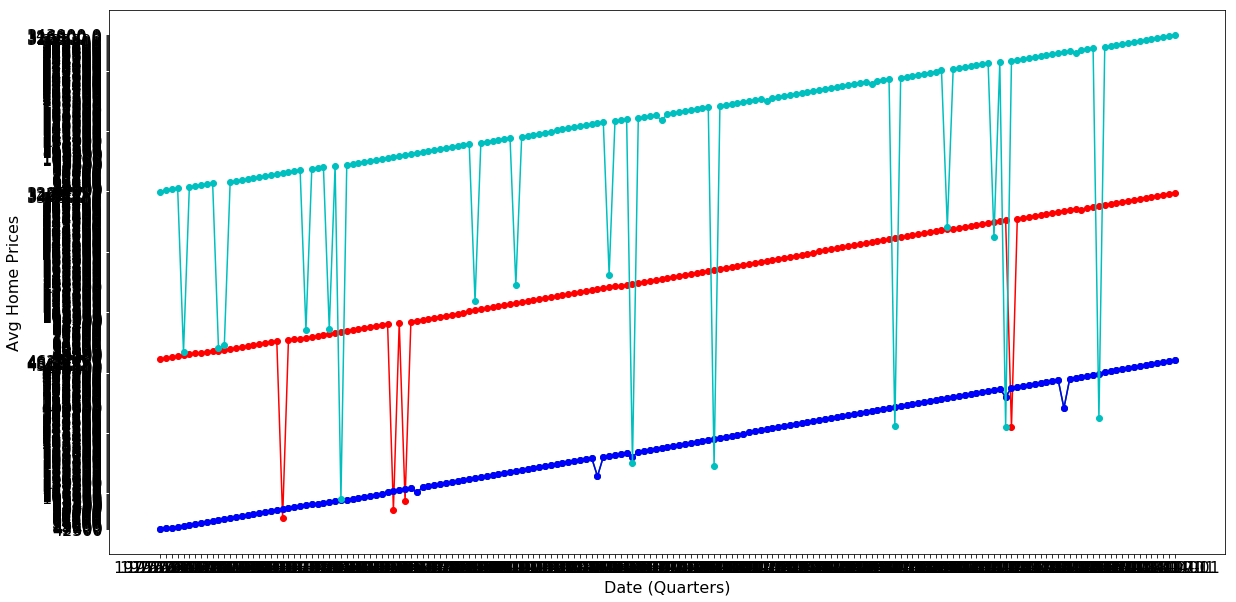

In [14]:
# plot graph of housing prices by region

fig2, ax2 = plt.subplots()

ax2.set_xlabel("Date (Quarters)")
ax2.set_ylabel("Avg Home Prices")

data_west = regional_housing["Avg West Region Housing Cost"]
data_south = regional_housing["Avg South Region Housing Cost"]
data_ne = regional_housing["Avg NE Region Housing Cost"]
data_mw = regional_housing["Avg MW Region Housing Cost"]

x_axis2 = regional_housing["Date"]

west_trend = plt.plot(x_axis2,data_west,color='g',marker = "o",label="West")
south_trend = plt.plot(x_axis2,data_south,color='r',marker = "o")
ne_trend = plt.plot(x_axis2,data_ne,color='b',marker = "o")
mw_trend = plt.plot(x_axis2,data_mw,color='c',marker = "o")

plt.show

In [15]:
# ANOVA between regions
# chi-squared test between regions



In [16]:
# call data from csv

# import housing file
regional_housing_file = "Housing prices by region.csv"
regional_housing_data = pd.read_csv(regional_housing_file)
regional_housing_data.head()

,DATE,ASPNE,ASPMW,ASPW,ASPS
0,1/1/1975,47300,41800,42300,38000
1,4/1/1975,46400,44000,43600,39800
2,7/1/1975,47400,42900,43600,39200
3,10/1/1975,47700,44500,47400,41300
4,1/1/1976,48600,45100,49200,43000


In [17]:
regional_housing= regional_housing_data.rename(columns={"DATE":"Date (Quarterly)","ASPS":"South","ASPW":"West","ASPNE":"Northeast","ASPMW":"Midwest"})
regional_housing.head()

,Date (Quarterly),Northeast,Midwest,West,South
0,1/1/1975,47300,41800,42300,38000
1,4/1/1975,46400,44000,43600,39800
2,7/1/1975,47400,42900,43600,39200
3,10/1/1975,47700,44500,47400,41300
4,1/1/1976,48600,45100,49200,43000


NameError: name 'r' is not defined

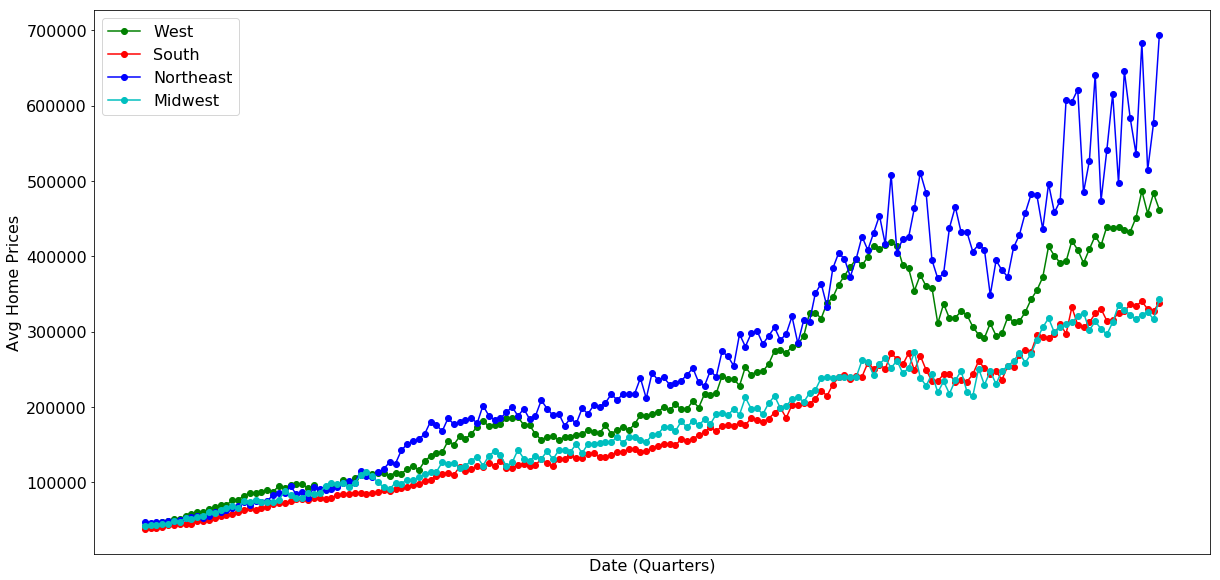

In [24]:
# plot graph of housing prices by region

plt.rcParams["figure.figsize"]=[20,10]
plt.rcParams["font.size"]=16

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
yearsFmt = mdates.DateFormatter('%Y')


fig3, ax3 = plt.subplots()

ax3.set_xlabel("Date (Quarters)")
ax3.set_ylabel("Avg Home Prices")

data_west = regional_housing["West"]
data_south = regional_housing["South"]
data_ne = regional_housing["Northeast"]
data_mw = regional_housing["Midwest"]

x_axis3 = regional_housing["Date (Quarterly)"]

west_trend = plt.plot(x_axis2,data_west,color='g',marker = "o")
south_trend = plt.plot(x_axis2,data_south,color='r',marker = "o")
ne_trend = plt.plot(x_axis2,data_ne,color='b',marker = "o")
mw_trend = plt.plot(x_axis2,data_mw,color='c',marker = "o")

plt.legend(loc="best")

# format the ticks
ax3.xaxis.set_major_locator(years)
ax3.xaxis.set_major_formatter(yearsFmt)
ax3.xaxis.set_minor_locator(months)

# round to nearest years...
datemin = np.datetime64(r.date[0], 'Y')
datemax = np.datetime64(r.date[-1], 'Y') + np.timedelta64(1, 'Y')
ax3.set_xlim(datemin, datemax)



plt.show

In [19]:
# Perform the ANOVA
stats.f_oneway(regional_housing["West"], regional_housing["South"], regional_housing["Northeast"], regional_housing["Midwest"])

F_onewayResult(statistic=27.70093650654343, pvalue=6.249977134312744e-17)

In [20]:
regional_20yr = regional_housing.iloc[95:175,:]
regional_20yr.head()

regional_10yr = regional_housing.iloc[135:175,:]
regional_10yr.head()

,Date (Quarterly),Northeast,Midwest,West,South
135,10/1/2008,395100,243800,358400,234500
136,1/1/2009,370600,219600,311000,234500
137,4/1/2009,377300,234000,336900,243500
138,7/1/2009,437700,217700,317800,243800
139,10/1/2009,465800,235300,318800,232900


In [21]:
# Select a subset of years and then do boxplot

In [ ]:
# Create a boxplot to compare means
regional_20yr.boxplot("mosq", by="treatment", figsize=(20, 10))
